## Damped Oscillation
This notebook does the calculations for a spring-mass system with friction proportional to the speed.

These commands get the notebook ready for plotting data and doing calculations.

In [1]:
from IPython.display import Audio, display
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Get ready to solve differential equations.

In [2]:
import sympy
from sympy import cos, diff, dsolve, Eq, exp, Function, init_printing, simplify, solveset, Symbol, symbols
init_printing()

def get_symbol_from_expr(expr, name):
    for s in expr.atoms(Symbol):
        if s.name == name:
            return s
    raise ValueError("Did not find symbol with name '{0}' in expression.".format(name))

def replace_symbols_in_expr(expr, external_symbols):
    """
    Replace the 'internal' symbols in an expression with symbols of the same name
    that are defined outside of the expression and can be shared between expressions.
    """
    for s in external_symbols:
        expr = expr.subs(get_symbol_from_expr(expr, s.name), s)
    return expr


Solve the equations for damped oscillation.

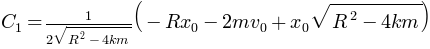

In [3]:
# Damped oscillation
m, k, R, t, C1, C2, x0, v0 = symbols('m k R t C1 C2 x0 v0')
x = Function('x')
v = Function('v')
eq = Eq(m * x(t).diff(t, 2), -k * x(t) - R*x(t).diff(t))
display(eq)

x_expr_1 = dsolve(eq, x(t)).args[1]
display(Eq(x(t), x_expr_1))
v_expr_1 = x_expr_1.diff(t)
display(Eq(v(t), v_expr_1))

x_expr_2 = replace_symbols_in_expr(x_expr_1, (C1, C2))
v_expr_2 = replace_symbols_in_expr(v_expr_1, (C1, C2))

C2_expr = simplify(tuple(solveset(Eq(v0, v_expr_2.subs(t, 0)), C2))[0])
display(Eq(C2, C2_expr))

C1_expr = simplify(tuple(solveset(Eq(x0, x_expr_2.subs({t: 0, C2: C2_expr})), C1))[0])
C1_sol = C1_expr
display(Eq(C1, C1_expr))

C2_sol = C2_expr.subs(C1, C1_sol)
display(Eq(C2, C2_sol))

Graph the result and generate audio.

Frequency: 355.881271709


Frequency: 999.999999945


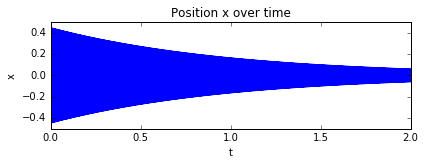

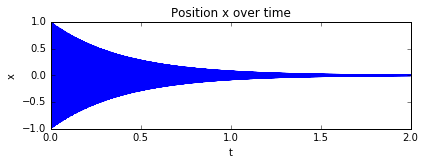

In [4]:
import cmath

def demo_damped_oscillator(m, k, R, x0, v0, sample_rate=44100):
    # Calculate the parameters
    rad = cmath.sqrt((R*R) - (4*k*m))
    a1 = (-R - rad) / (2*m)
    a2 = (-R + rad) / (2*m)
    f = np.linalg.norm(a1) / (2 * cmath.pi)
    print("Frequency:", f)
    C1 = (1 / (2*rad)) * ((-R*x0) - (2*m*v0) + (x0*rad))
    C2 = (-1 / (R - rad)) * ((2*m*v0) + (1/(2*rad))*(R + rad)*((-R*x0) - (2*m*v0) + (x0*rad)))

    # Generate the samples
    time_duration = 2.0  # seconds
    t = np.linspace(0.0, time_duration, int(time_duration*sample_rate)+1)
    x = (C1*np.exp(t * a1) + C2*np.exp(t*a2)).real
    v = (C1*a1*np.exp(t*a1) + C2*a2*np.exp(t*a2)).real

    # Graph the samples
    fig = plt.figure()
    nrows, ncols = 2, 1
    #
    ax1 = fig.add_subplot(nrows, ncols, 1)
    ax1.set_title("Position x over time")
    ax1.set_xlabel("t")
    ax1.set_ylabel("x")
    ax1.plot(t, x)
    #
    fig.tight_layout()
    
    # Play the audio
    audio = Audio(data=x, rate=sample_rate)
    display(audio)

demo_damped_oscillator(m=1.0, k=5000000.0, R=2.0, x0=0.0, v0=1000.0, sample_rate=22050)
demo_damped_oscillator(m=0.001, k=39478.4176, R=0.005, x0=1.0, v0=0.0, sample_rate=22050)